In [252]:
%run dataFormating.ipynb

/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,22,28,32,38) have mixed types. Specify dtype option on import or set low_mem

temporalities already set


A Jupyter Widget

In [202]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [203]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [204]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8002820377225454

In [205]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.7838004583112991

In [206]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.80019390093425

Conclusion: Accuracy is around 75%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [207]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [208]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.7566543275163053

In [209]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8325401022386744

In [210]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8376520359598096

Conclusion: Accuracy is around 75%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [211]:
allDataClassif

,sessionsCount,scorebefore,scoreafter,scoreundefined,complete,configure,craft,death,equip,unequip,...,6,7,8,9,10,11,12,13,14,anonymousID
"""8d352896-a3f1-471c-8439-0f426df901c1""",1.0,18.0,-1.0,-1.0,0.0,0.0,5.0,5.0,16.0,1.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,8d352896-a3f1-471c-8439-0f426df901c1
"""7037c5b2-c286-498e-9784-9a061c778609""",2.0,-1.0,22.0,-1.0,2.0,0.0,45.0,25.0,3.0,4.0,...,133.348,175.314,183.037,547.511,158.229,6.438,27.503,155.083,142.235,7037c5b2-c286-498e-9784-9a061c778609
"""5c4939b5-425b-4d19-b5d2-0384a515539e""",1.0,-1.0,15.0,-1.0,0.0,0.0,7.0,11.0,25.0,3.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,5c4939b5-425b-4d19-b5d2-0384a515539e
"""acb9c989-b4a6-4c4d-81cc-6b5783ec71d8""",1.0,23.0,-1.0,-1.0,0.0,1.0,11.0,11.0,16.0,3.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,acb9c989-b4a6-4c4d-81cc-6b5783ec71d8
"""1a03bc9e-bed4-4ddd-be7f-af23b1d5eb65""",1.0,3.0,-1.0,-1.0,0.0,1.0,10.0,118.0,133.0,7.0,...,454.489,137.950,274.981,53.203,64.183,3.634,4.095,3600.000,3600.000,1a03bc9e-bed4-4ddd-be7f-af23b1d5eb65
"""3685a015-fa97-4457-ad73-da1c50210fe1""",1.0,2.0,21.0,-1.0,0.0,0.0,19.0,54.0,79.0,11.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3685a015-fa97-4457-ad73-da1c50210fe1
"""9a2e8271-a84d-4b3c-a670-2d65326ed824""",1.0,-1.0,-1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,9a2e8271-a84d-4b3c-a670-2d65326ed824
"""bfdfd356-5d6f-4696-a2f1-c1dc338aa64b""",4.0,6.0,19.0,-1.0,0.0,1.0,12.0,67.0,69.0,17.0,...,720.020,96.493,236.166,86.135,55.430,5.048,9.579,971.505,3600.000,bfdfd356-5d6f-4696-a2f1-c1dc338aa64b
"""a7936587-8b71-43b6-9c61-17b2c2b55de3""",2.0,4.0,13.0,-1.0,0.0,1.0,5.0,19.0,16.0,2.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,a7936587-8b71-43b6-9c61-17b2c2b55de3
"""7ea5c999-8001-4eee-9cdf-580d0783ce5c""",1.0,-1.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,7ea5c999-8001-4eee-9cdf-580d0783ce5c


## Can the score of a player be predicted with their RedMetrics data

In [212]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Center and scale data
features = preprocessing.scale(features)

array([ 3.51130491e-01, -2.08160044e-01, -3.31914846e-02,  2.42895524e-01,
        2.20371895e-01,  3.33056524e-02, -3.71866964e+00, -2.06830694e+00,
       -8.66321284e+01, -3.98174184e-01])

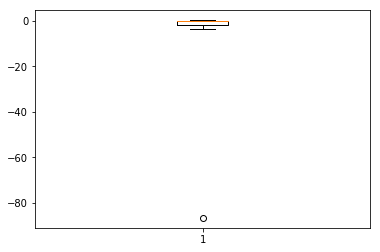

In [213]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [214]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([ 3.80356742e-02, -2.00045438e-01, -9.96773112e-02,  1.17971200e-01,
        2.21648971e-01,  6.24953026e-02, -4.77376548e+00, -1.65829162e+00,
       -8.67236069e+01, -5.79834078e-01])

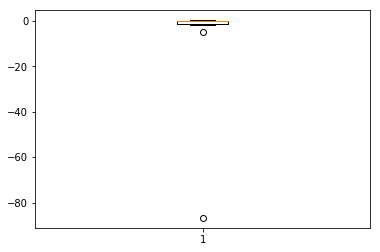

In [215]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [216]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + list(range(15))]
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([ 1.48337665e-01, -2.13230057e-01, -2.25929407e-01,  7.71973432e-02,
        2.38358095e-01,  5.89113412e-03, -3.33779041e+00, -1.89348221e+00,
       -1.02376050e+02, -4.72927989e-01])

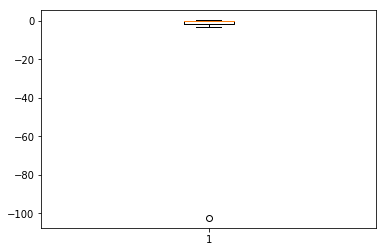

In [217]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [253]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features.loc[:,"sessionsCount":"maxChapter"]
target = anonymousData[anonymousData["scoreafter"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-2.11480954, -1.        , -0.12415974, -1.14838021, -0.11124956,
       -0.8545335 , -0.84592382, -1.14838021, -6.9753649 , -2.10699588])

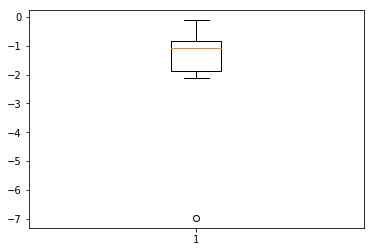

In [254]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [259]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features.loc[:,"sessionsCount":"maxChapter"]
target = sum(anonymousData[anonymousData["scoreafter"] >= 0]["gameInterest"], anonymousData[anonymousData["scoreafter"] >= 0]["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-0.78640085, -0.95130634, -0.11968672, -0.19188323, -0.00649391,
       -0.01281595, -0.78640085, -0.00768957, -0.21447296, -0.02060063])

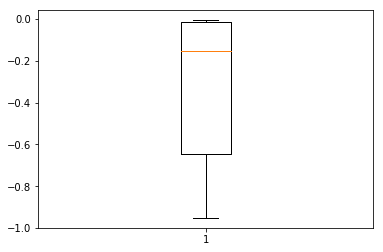

In [260]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [282]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreafter"] >= 0]
    features = features.loc[:,"sessionsCount":"maxChapter"]
    target = anonymousData[anonymousData["scoreafter"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
Mean,0.898485,0.779604,0.767832,0.624825,0.577273,0.645455,0.729371,0.737063,0.731818,0.865152,...,0.797786,0.948485,0.913636,0.931818,0.765152,0.684965,0.643357,0.630769,0.916434,0.915152
Var,0.081396,0.040243,0.061665,0.053775,0.146147,0.055339,0.056785,0.148844,0.131268,0.099286,...,0.133062,0.042153,0.057616,0.034217,0.108521,0.138129,0.063015,0.060221,0.052891,0.003030


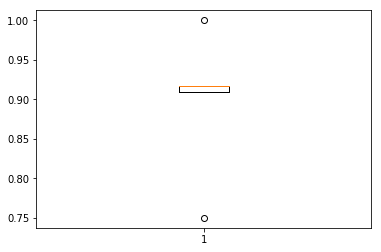

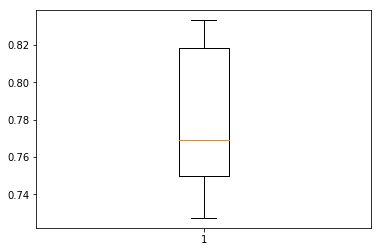

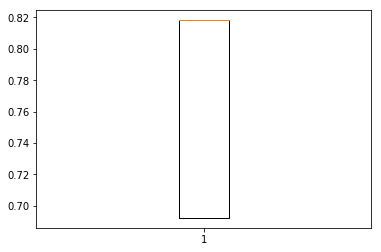

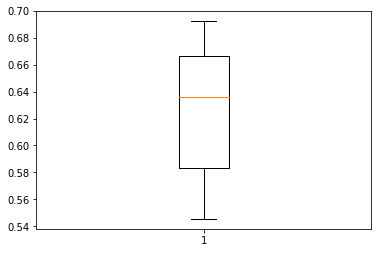

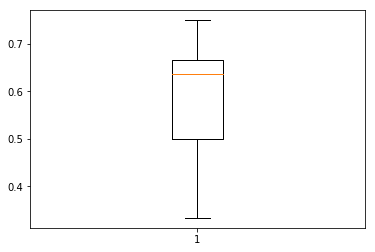

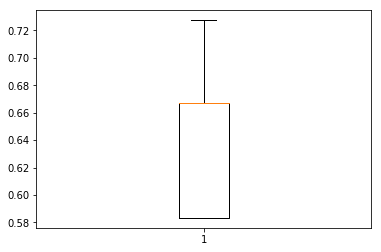

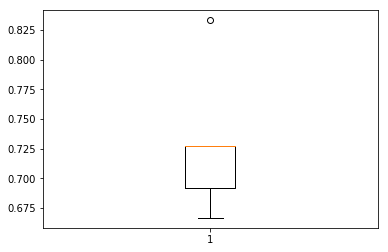

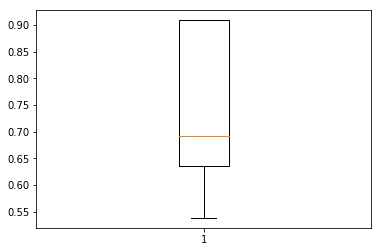

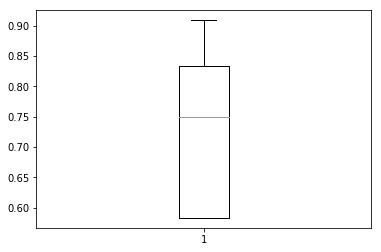

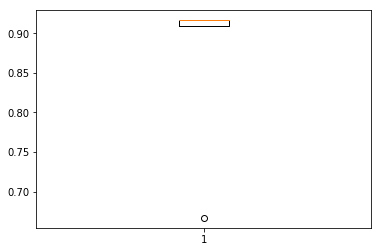

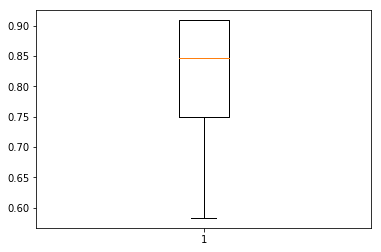

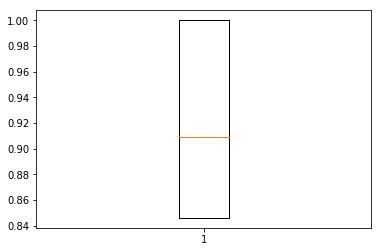

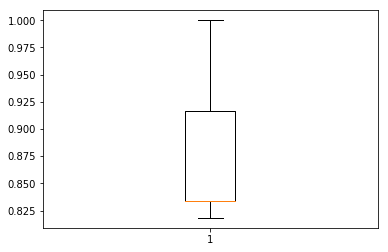

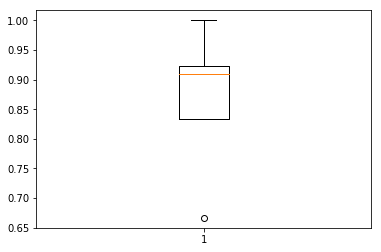

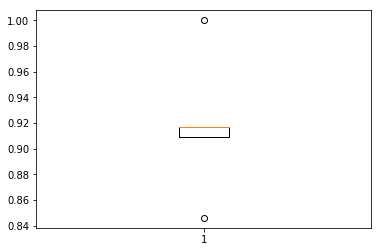

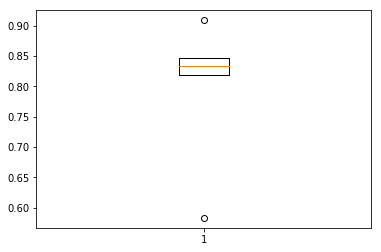

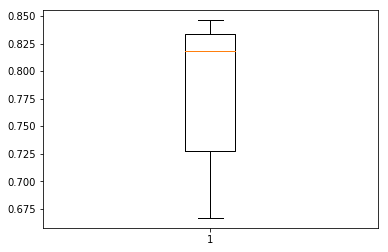

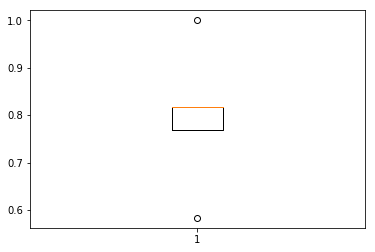

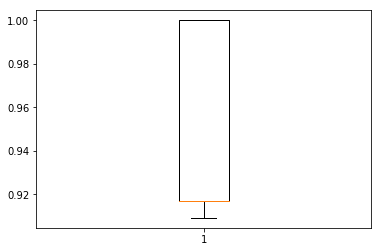

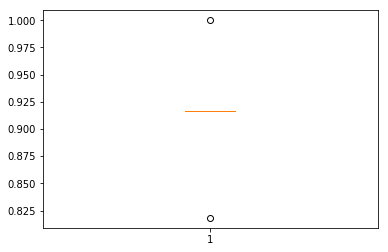

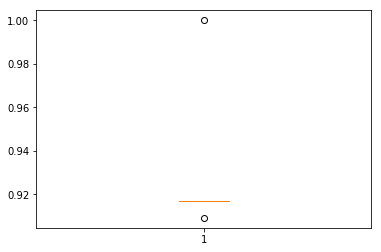

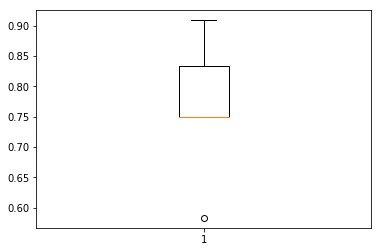

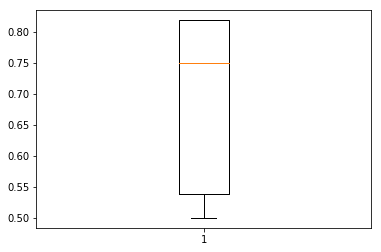

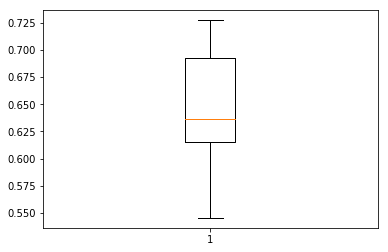

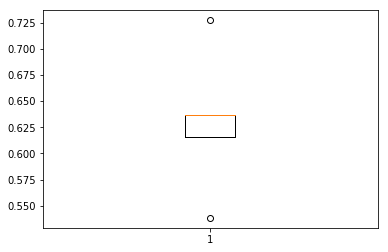

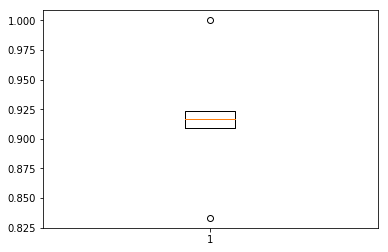

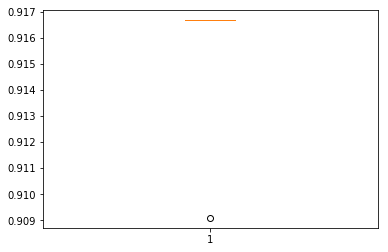

In [283]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for questionNb in range(27):
    questionTag = "Q" + str(questionNb + 1)
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (30/01/2018)
TODO Raphael: Check which questions you want additional analysis for

In [251]:
gameAndCorrectedAfterDataClassif.columns

Index([           'sessionsCount',               'scoreafter',
                       'complete',                'configure',
                          'craft',                    'death',
                          'equip',                  'unequip',
                            'add',                   'remove',
                        'gotourl',                   'pickup',
                          'reach',                  'restart',
                     'selectmenu',                    'start',
                     'maxChapter',                          0,
                                1,                          2,
                                3,                          4,
                                5,                          6,
                                7,                          8,
                                9,                         10,
                               11,                         12,
                               13,                     